<a href="https://colab.research.google.com/github/Ihsanalmasry/MachingLearning_Labs_IHSAN-ALMASRY/blob/main/MLF_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

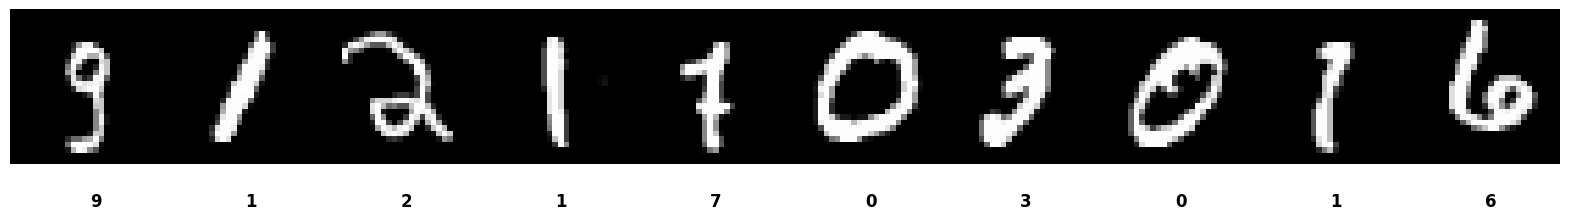


=== Dataset Examination ===
1. Data type: Grayscale handwritten digits (0-9)
2. Train samples: 60000, Test samples: 10000
3. Color channels: 1 (grayscale)
4. Image size: 28x28 pixels
5. Preprocessing needed: Normalization and reshaping
6. Number of classes: 10 (digits 0-9)
7. Target preprocessing: One-hot encoding


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.7036 - loss: 0.8992 - val_accuracy: 0.9747 - val_loss: 0.0841
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9545 - loss: 0.1589 - val_accuracy: 0.9843 - val_loss: 0.0538
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9703 - loss: 0.1035 - val_accuracy: 0.9860 - val_loss: 0.0485
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9754 - loss: 0.0859 - val_accuracy: 0.9865 - val_loss: 0.0457
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9796 - loss: 0.0697 - val_accuracy: 0.9872 - val_loss: 0.0469
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9843 - loss: 0.0539 - val_accuracy: 0.9895 - val_loss: 0.0418
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.9865 - loss: 0.0481 - val_accuracy: 0.9887 - val_loss: 0.0416
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9885 - loss: 0.

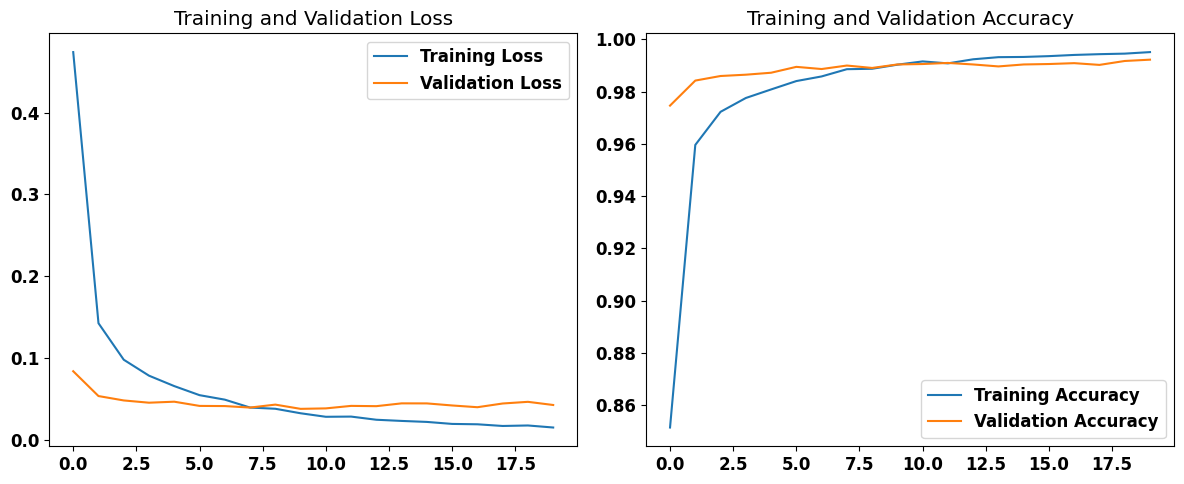


Test Accuracy: 99.30%
Test Loss: 0.0265
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


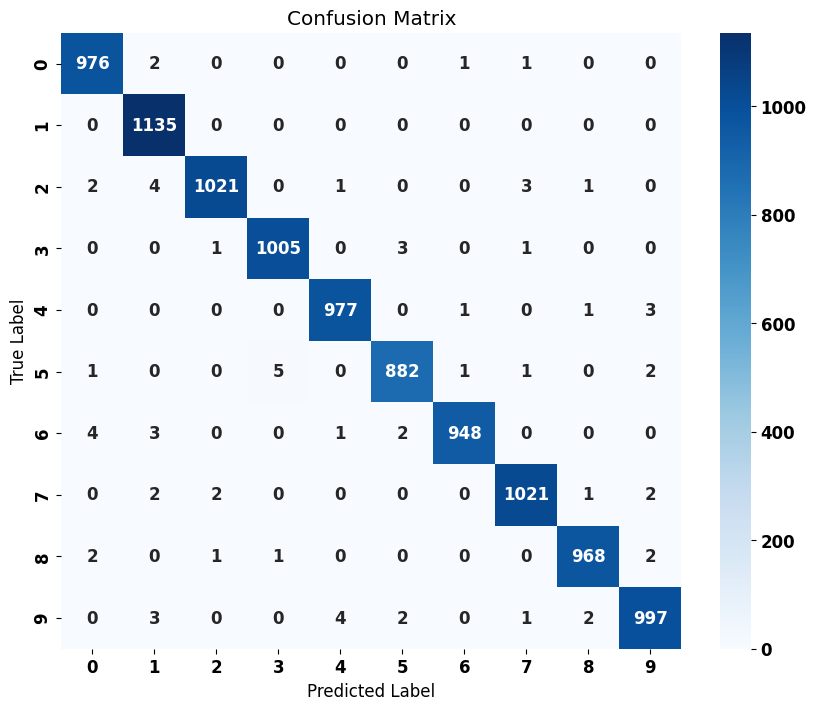

In [1]:
####Hand-written digits recognition

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns


font = {'weight': 'bold', 'size': 12}
matplotlib.rc('font', **font)


# Loading Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Dataset examination
def display_random_images(x_data, y_data, count=10):
    index = np.arange(len(x_data))
    selected_ind = np.random.choice(index, count)
    selected_img = x_data[selected_ind]
    selected_labels = y_data[selected_ind]
    concat_img = np.concatenate(selected_img, axis=1)

    plt.figure(figsize=(20,10))
    plt.imshow(concat_img, cmap="gray")

    for id_label, label in enumerate(selected_labels):
        plt.text(14 + 28*id_label, 28*(5/4), label)
    plt.axis('off')
    plt.show()

display_random_images(X_train, y_train)

# Dataset examination answers:
print("\n=== Dataset Examination ===")
print("1. Data type: Grayscale handwritten digits (0-9)")
print(f"2. Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"3. Color channels: 1 (grayscale)")
print(f"4. Image size: {X_train.shape[1]}x{X_train.shape[2]} pixels")
print("5. Preprocessing needed: Normalization and reshaping")
print(f"6. Number of classes: {len(np.unique(y_train))} (digits 0-9)")
print("7. Target preprocessing: One-hot encoding")


# Normalizing and reshaping images
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building the model
model = Sequential()

# Defining the model structure
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()


# Model training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Model Evaluation on validation data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Evaluation on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


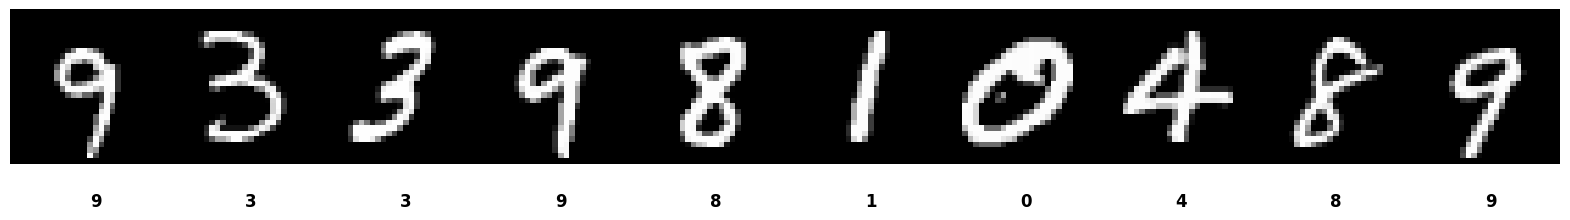


=== Dataset Examination ===
1. Data type: Grayscale handwritten digits (0-9)
2. Train samples: 60000, Test samples: 10000
3. Color channels: 1 (grayscale)
4. Image size: 28x28 pixels
5. Preprocessing needed: Normalization and reshaping
6. Number of classes: 10 (digits 0-9)
7. Target preprocessing: One-hot encoding


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372,746 (1.42 MB)

 Trainable params: 371,850 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 169s 218ms/step - accuracy: 0.7974 - loss: 1.1054 - val_accuracy: 0.9812 - val_loss: 0.4451 - learning_rate: 5.0000e-04
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 194s 208ms/step - accuracy: 0.9696 - loss: 0.4609 - val_accuracy: 0.9866 - val_loss: 0.3328 - learning_rate: 5.0000e-04
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 202s 208ms/step - accuracy: 0.9790 - loss: 0.3378 - val_accuracy: 0.9888 - val_loss: 0.2512 - learning_rate: 5.0000e-04
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 203s 209ms/step - accuracy: 0.9806 - loss: 0.2578 - val_accuracy: 0.9897 - val_loss: 0.1941 - learning_rate: 5.0000e-04
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 157s 209ms/step - accuracy: 0.9831 - loss: 0.2052 - val_accuracy: 0.9878 - val_loss: 0.1677 - learning_rate: 5.0000e-04
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 207ms/step - accuracy: 0.9847 - loss: 0.1722 - val_accuracy: 0.9897 - val_loss: 0.1449 - learning_rate: 5.0000e-04
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 

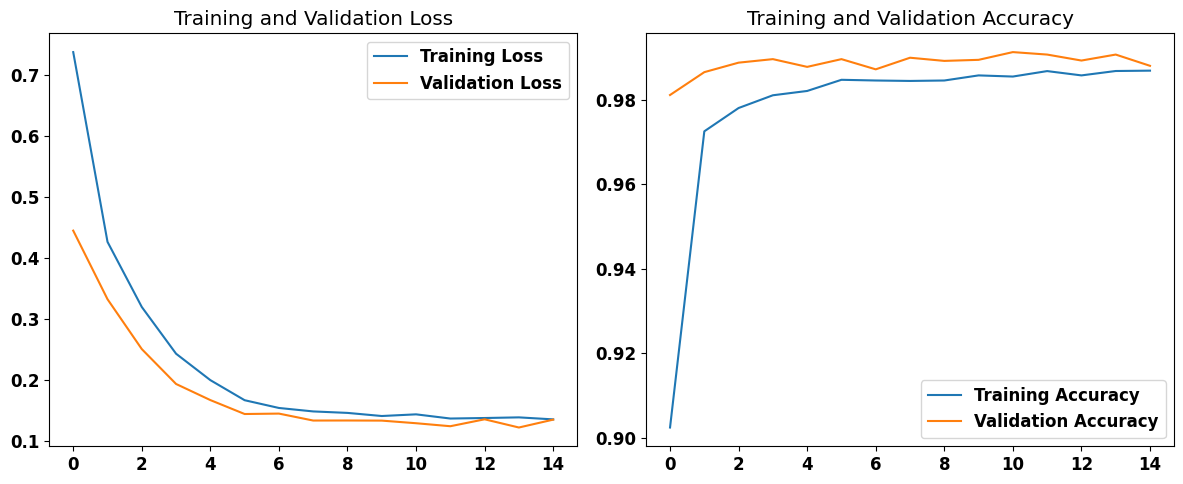


Test Accuracy: 99.19%
Test Loss: 0.1158
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


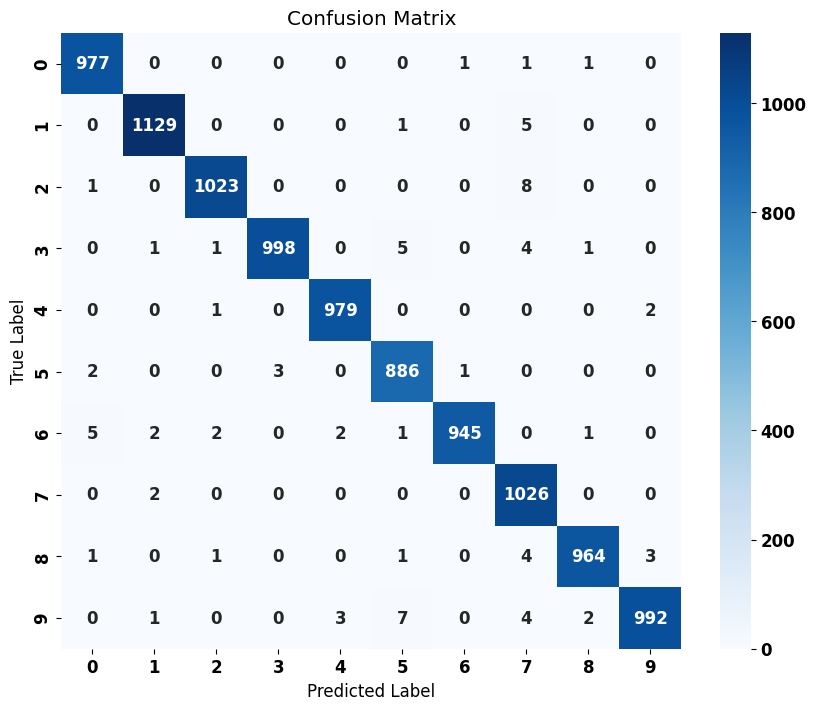

In [3]:
####Hand-written digits recognition

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns


font = {'weight': 'bold', 'size': 12}
matplotlib.rc('font', **font)


# Loading Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Dataset examination
def display_random_images(x_data, y_data, count=10):
    index = np.arange(len(x_data))
    selected_ind = np.random.choice(index, count)
    selected_img = x_data[selected_ind]
    selected_labels = y_data[selected_ind]
    concat_img = np.concatenate(selected_img, axis=1)

    plt.figure(figsize=(20,10))
    plt.imshow(concat_img, cmap="gray")

    for id_label, label in enumerate(selected_labels):
        plt.text(14 + 28*id_label, 28*(5/4), label)
    plt.axis('off')
    plt.show()

display_random_images(X_train, y_train)

# Dataset examination answers:
print("\n=== Dataset Examination ===")
print("1. Data type: Grayscale handwritten digits (0-9)")
print(f"2. Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"3. Color channels: 1 (grayscale)")
print(f"4. Image size: {X_train.shape[1]}x{X_train.shape[2]} pixels")
print("5. Preprocessing needed: Normalization and reshaping")
print(f"6. Number of classes: {len(np.unique(y_train))} (digits 0-9)")
print("7. Target preprocessing: One-hot encoding")


# Normalizing and reshaping images
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building the model with hyperparameter tuning
model = Sequential()

# Enhanced convolutional blocks with tuning
model.add(Conv2D(64, (3, 3), activation='relu',
                kernel_regularizer=l2(0.001),
                input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu',
               kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu',
               kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu',
               kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compiling the model with tuned parameters
optimizer = Adam(learning_rate=0.0005)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()


# Model training with callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# Model Evaluation on validation data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Evaluation on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()